![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Justin Balwan
***

## Overview

This project focuses on discovering the aspects of top worldwide grossing films so that Microsoft's new movie studio can emulate them to determine how they should create their films. Given a movie database containing various files, descriptive analysis was conducted to isolate the top grossing genres, top grossing years, and top grossing studios. The results and recommendations go hand in hand; with regards to genre, Microsoft's new movie studio should produce films with the genres Fantasy, Musical, Sci-Fi, Adventure, and Animation. With regards to years, Microsoft's new movie studio should study the films produced in 2018, 2017, 2016, 2012, and 2010 to explore any common or shared trends. Finally, with regard to studios, Microsoft's new movie studio should observe MUBI, Spanglish, Super, Blue Fox, and RLJ studios.

## Business Problem

Microsoft's main objective with this project is to determine which films are currently doing the best in the box office. Doing so aids Microsoft in deciding which type of films they want to produce. When deciding how to properly portray the current successful films, I chose to analyze the top worldwide grossing films. Even though a film may be rated poorly, it still has the ability to top the charts in the box office. All other measures of success – such as rating or popularity – are subjective and inaccurately portray how well a film is doing. If Microsoft implements changes based on the factors that makes these top grossing films stay at the top, they will experience success of their own.

## Data Understanding

All of the information provided for this project came from a larger movie database which contained files that extracted information from popular movie information websites. These websites include IMDB, Box Office Mojo, Rotten Tomatoes, The Numbers, and TheMoviesDB. The various files within this database contained related information such as a film's genre, language, budget, actors, and much more. For this project, I intended to provide Microsoft with effective recommendations by examining what makes the current films so successful. I decided that the current successful films were successful because of the amount of worldwide gross they earned. Therefore, my target variable became worldwide gross. From there, I decided to focus in on different aspects related to worldwide gross; I chose to measure the top worldwide grossing genres, the top worldwide grossing years, and the top worldwide grossing studios.

#### Importing Standard Packages & Importing Data

In [479]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [480]:
#Importing Data Using Glob
import os
from glob import glob
import pandas as pd

csv_files = glob("./zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filename
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [481]:
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [482]:
csv_files_dict

{'imdb_title_crew_gz':                                directors              writers
 tconst                                                       
 tt0285252                      nm0899854            nm0899854
 tt0438973                            NaN  nm0175726,nm1802864
 tt0462036                      nm1940585            nm1940585
 tt0835418                      nm0151540  nm0310087,nm0841532
 tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
 ...                                  ...                  ...
 tt8999974                     nm10122357           nm10122357
 tt9001390                      nm6711477            nm6711477
 tt9001494          nm10123242,nm10123248                  NaN
 tt9004986                      nm4993825            nm4993825
 tt9010172                            NaN            nm8352242
 
 [146144 rows x 2 columns],
 'tmdb_movies_gz':                  genre_ids      id original_language  \
 0          [12, 14, 10751]   12444                en 

In [483]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

### Creating Data Frames
The box office mojo gross data, title basics, title ratings, and the numbers movie budget.

#### Box Office Mojo Gross Data

In [484]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross_gz']
bom_movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Title Basics Data

In [485]:
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Title Ratings Data

In [486]:
imdb_title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
imdb_title_ratings_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


#### The Numbers Movie Budget Data

In [487]:
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Data Cleaning

For the Box Office Mojo Gross Data, Title Basics, Title Ratings, The Numbers Movie Budget, and IMDB Name Basics files, I dropped the unnecessary columns listed in each for simplicity and clarity purposes.

#### Box Office Mojo Gross Data

In [490]:
# Dropping Columns
bom_movie_gross_df.drop(columns = ['domestic_gross', 'foreign_gross'], inplace=True)

In [491]:
bom_movie_gross_df.head()

,studio,year
title,,
Toy Story 3,BV,2010
Alice in Wonderland (2010),BV,2010
Harry Potter and the Deathly Hallows Part 1,WB,2010
Inception,WB,2010
Shrek Forever After,P/DW,2010


#### IMDB Title Basics Data

In [492]:
# Simplifying Column Names & Dropping Columns
imdb_title_basics_df.columns = imdb_title_basics_df.columns.str.lower().str.replace(' ', '_')
imdb_title_basics_df.drop(columns = ['original_title'], inplace=True)

In [493]:
imdb_title_basics_df.head()

,primary_title,start_year,runtime_minutes,genres
tconst,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


#### IMDB Title Ratings Data

In [494]:
# Dropping Columns
imdb_title_ratings_df.drop(columns = ['numvotes'], inplace=True)

In [495]:
imdb_title_ratings_df.head()

,averagerating
tconst,
tt10356526,8.3
tt10384606,8.9
tt1042974,6.4
tt1043726,4.2
tt1060240,6.5


#### The Numbers Movie Budgets Data

In [496]:
# Simplifying Column Names & Dropping Columns
tn_movie_budgets_df.columns = tn_movie_budgets_df.columns.str.lower().str.replace(' ', '_')
tn_movie_budgets_df.drop(columns = ['release_date', 'domestic_gross'], inplace=True)

In [497]:
tn_movie_budgets_df.head()

,movie,production_budget,worldwide_gross
id,,,
1,Avatar,"$425,000,000","$2,776,345,279"
2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
3,Dark Phoenix,"$350,000,000","$149,762,350"
4,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


### Merging IMDB Title Information Data
I chose to merge the IMDB Title Data together for concision purposes for easy use later on.

In [502]:
# Created a new variable called title_information_df to store the merge
title_information_df = pd.merge(imdb_title_basics_df,
                               imdb_title_ratings_df,
                               on=['tconst'],
                               how='left')
title_information_df.head()

,primary_title,start_year,runtime_minutes,genres,averagerating
tconst,,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2
tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9
tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5


### Filtering Films By Descending Worldwide Gross
Sorted The Numbers Movie Budget file by worldwide gross. I then sorted worldwide gross in descending order, which altered the data frame to highlight the top worldwide grossing films.

In [503]:
tn_movie_budgets_df = tn_movie_budgets_df.sort_values(by='worldwide_gross', ascending=False)
tn_movie_budgets_df.head(10)

,movie,production_budget,worldwide_gross
id,,,
38,Fifty Dead Men Walking,"$10,000,000","$997,921"
33,Duma,"$12,000,000","$994,790"
63,Insidious,"$1,500,000","$99,870,886"
84,Hellboy,"$60,000,000","$99,823,958"
14,Mad Max,"$200,000","$99,750,000"
79,Alpha,"$51,000,000","$99,624,873"
83,Street Fighter,"$35,000,000","$99,423,000"
93,Nacho Libre,"$32,000,000","$99,296,462"
74,Desert Blue,"$5,000,000","$99,147"


In [504]:
# Calculate the shape of tn_movie_budgets_df
tn_movie_budgets_df.shape

(5782, 3)

In [505]:
# Calculate the shape of title_information_df
title_information_df.shape

(146144, 5)

### Finding The Top Grossing Genres
I created two new variables called genres_worldwide_gross and genres_worldwide_gross_df to ultimately compute the top grossing genres. I plan to use the results as one of my recommendations to Microsoft.

In [506]:
# Creates a new variable called genres_worldwide_gross to store the merge between title_information_df and tn_movie_budgets_df
genres_worldwide_gross = pd.merge(title_information_df,
         tn_movie_budgets_df,
         left_on=['primary_title'],
         right_on=['movie'],
         how='inner')
genres_worldwide_gross.head()


,primary_title,start_year,runtime_minutes,genres,averagerating,movie,production_budget,worldwide_gross
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Foodfight!,"$45,000,000","$73,706"
1,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",NaN,Mortal Kombat,"$20,000,000","$122,133,227"
2,The Overnight,2010,88.0,NaN,7.5,The Overnight,"$200,000","$1,165,996"
3,The Overnight,2015,79.0,"Comedy,Mystery",6.1,The Overnight,"$200,000","$1,165,996"
4,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,On the Road,"$25,000,000","$9,313,302"


In [507]:
# Gets rid of the '$' and ',' characters
genres_worldwide_gross['worldwide_gross'] = genres_worldwide_gross['worldwide_gross'].apply(lambda x: x.replace('$', '').replace(',', ''))

In [508]:
# Converts worldwide_gross to an int so I can calculate it's mean
genres_worldwide_gross['worldwide_gross'] = genres_worldwide_gross['worldwide_gross'].astype(int)

In [509]:
# Gets rid of the '$' and ',' characters while converting production_budget to an int
genres_worldwide_gross['production_budget'] = genres_worldwide_gross['production_budget'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)

In [510]:
genres_worldwide_gross

,primary_title,start_year,runtime_minutes,genres,averagerating,movie,production_budget,worldwide_gross
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Foodfight!,45000000,73706
1,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",NaN,Mortal Kombat,20000000,122133227
2,The Overnight,2010,88.0,NaN,7.5,The Overnight,200000,1165996
3,The Overnight,2015,79.0,"Comedy,Mystery",6.1,The Overnight,200000,1165996
4,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,On the Road,25000000,9313302
...,...,...,...,...,...,...,...,...
3810,Fuel,2018,NaN,"Documentary,Sport",NaN,Fuel,2500000,174255
3811,Diner,2019,NaN,Crime,NaN,Diner,5000000,12592907
3812,Traitor,2015,110.0,"Action,Drama,Romance",NaN,Traitor,22000000,27882226
3813,Ray,2018,111.0,Crime,NaN,Ray,40000000,124823094


In [511]:
# Calculates the number of films per genre, including multiple genres in the same row
genres_worldwide_gross['genres'].value_counts()

Drama                       497
Documentary                 290
Comedy                      140
Comedy,Drama                104
Horror                       95
                           ... 
Biography,Drama,Musical       1
Adventure,Horror,Sci-Fi       1
Documentary,Horror            1
Adventure,Comedy,Romance      1
Action,Crime,Fantasy          1
Name: genres, Length: 345, dtype: int64

In [512]:
# Converts each value in the genres column to a string
genres_worldwide_gross['genres'] = genres_worldwide_gross['genres'].astype(str)

In [513]:
# Splits up each genre by discarding the ',' between them in each row
genres_worldwide_gross['genres'] = genres_worldwide_gross['genres'].apply(lambda x: x.split(','))

In [514]:
# Explodes each row in the genres column; essentially puts each genre in their own row
# Creates a new variable called genres_worldwide_gross_df that stores the result of exploding genres in genres_worldwide_gross 
genres_worldwide_gross_df = genres_worldwide_gross.explode('genres')
genres_worldwide_gross_df

,primary_title,start_year,runtime_minutes,genres,averagerating,movie,production_budget,worldwide_gross
0,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706
0,Foodfight!,2012,91.0,Animation,1.9,Foodfight!,45000000,73706
0,Foodfight!,2012,91.0,Comedy,1.9,Foodfight!,45000000,73706
1,Mortal Kombat,2021,NaN,Action,NaN,Mortal Kombat,20000000,122133227
1,Mortal Kombat,2021,NaN,Adventure,NaN,Mortal Kombat,20000000,122133227
...,...,...,...,...,...,...,...,...
3812,Traitor,2015,110.0,Action,NaN,Traitor,22000000,27882226
3812,Traitor,2015,110.0,Drama,NaN,Traitor,22000000,27882226
3812,Traitor,2015,110.0,Romance,NaN,Traitor,22000000,27882226
3813,Ray,2018,111.0,Crime,NaN,Ray,40000000,124823094


### Finding the Top Grossing Years
Created a new variables called most_grossing_years_df. This variable will help me depict the top grossing years later on. I plan to use the results as a second recommendation to Microsoft.

In [515]:
# Creates a new variable called most_grossing_years_df to store the merge between genres_worldwide_gross_df and bom_movie_gross_df 
# Utilizes genres_worldwide_gross_df in the merge because it already contained the necessary data
most_grossing_years_df = pd.merge(genres_worldwide_gross_df,
                                 bom_movie_gross_df,
                                 left_on=['start_year'],
                                 right_on=['year'],
                                 how='inner')
most_grossing_years_df.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,movie,production_budget,worldwide_gross,studio,year
0,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,BV,2012
1,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,Sony,2012
2,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,WB,2012
3,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,WB (NL),2012
4,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,Fox,2012


### Finding the Top Grossing Studio

The merge above provides me with the necessary tools to compute the top grossing studio

In [521]:
# Creates a new variable called most_grossing_studio_df which stores the information of most_grossing_years_df
# Copying Most Grossing Years' work to determine the Top Grossing Studio later on 
most_grossing_studio_df = most_grossing_years_df
most_grossing_studio_df

,primary_title,start_year,runtime_minutes,genres,averagerating,movie,production_budget,worldwide_gross,studio,year
0,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,BV,2012
1,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,Sony,2012
2,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,WB,2012
3,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,WB (NL),2012
4,Foodfight!,2012,91.0,Action,1.9,Foodfight!,45000000,73706,Fox,2012
...,...,...,...,...,...,...,...,...,...,...
2843437,Ray,2018,111.0,Crime,NaN,Ray,40000000,124823094,Magn.,2018
2843438,Ray,2018,111.0,Crime,NaN,Ray,40000000,124823094,FM,2018
2843439,Ray,2018,111.0,Crime,NaN,Ray,40000000,124823094,Sony,2018
2843440,Ray,2018,111.0,Crime,NaN,Ray,40000000,124823094,Synergetic,2018


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Graphing The Top Grossing Genres
I created a larger graph detailing the worldwide gross of each genre. Having computed that, I narrowed the graph down to filter out the top five grossing genres. I created a second graph detailing the results.

#### Creating a Bar Graph - Worldwide Gross Of Each Genre

Text(0, 0.5, 'Genres')

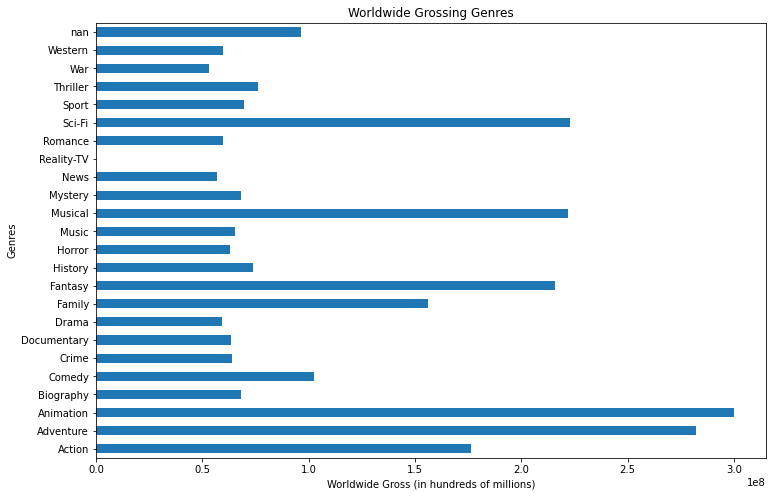

In [537]:
genres_worldwide_gross_df.groupby(by='genres').mean()['worldwide_gross'].plot(kind='barh', figsize=(12,8))
plt.title('Worldwide Grossing Genres')
plt.xlabel('Worldwide Gross (in hundreds of millions)')
plt.ylabel('Genres')

#### Creating a Bar Graph - Top Five Grossing Genres

<AxesSubplot:title={'center':'Top Grossing Genres'}, xlabel='Worldwide Gross (in hundreds of millions)', ylabel='Genres'>

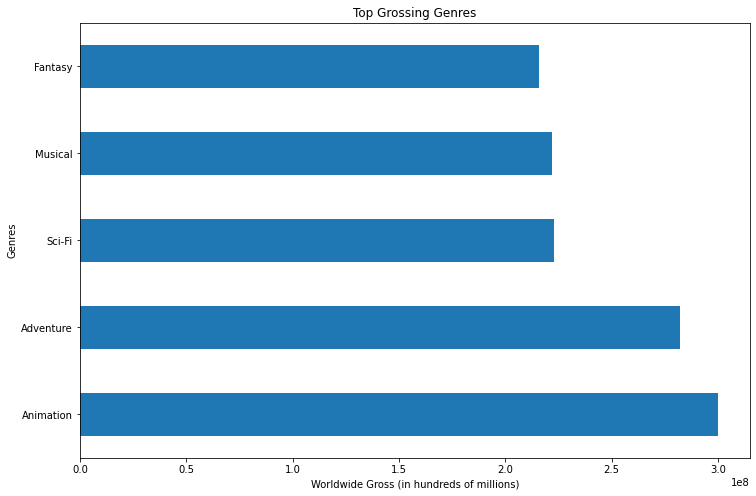

In [535]:
# Creates a new variable top_grossing_genres_df to depict the top five grossing genres
top_grossing_genres_df = genres_worldwide_gross_df.groupby(by='genres').mean()['worldwide_gross'].sort_values(ascending=False).head(5).plot(kind='barh', figsize=(12,8))
plt.title('Top Grossing Genres')
plt.xlabel('Worldwide Gross (in hundreds of millions)')
plt.ylabel('Genres')
top_grossing_genres_df

### Graphing The Top Grossing Years
Similar to the graphs above, I chose to create a graph highlighting the worldwide gross for each year, filter down to the top five highest grossing years, and create a second graph depicting those results.

#### Creating a Bar Graph - Worldwide Gross For Each Year

<AxesSubplot:title={'center':'Top Grossing Years'}, xlabel='Worldwide Gross (in hundreds of millions)', ylabel='Years'>

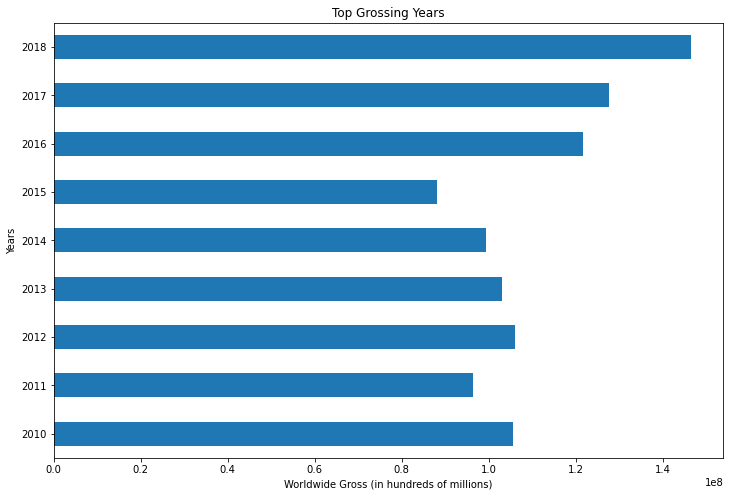

In [530]:
# Creates a new variable grossing_years_df to show the overall top grossing years from 2010 - 2018
grossing_years_df = most_grossing_years_df.groupby(by='year').mean()['worldwide_gross'].plot(kind='barh', figsize=(12,8))
plt.title('Top Grossing Years')
plt.xlabel('Worldwide Gross (in hundreds of millions)')
plt.ylabel('Years')
grossing_years_df

#### Creating a Bar Graph - Top Five Grossing Years

<AxesSubplot:title={'center':'Top Grossing Years'}, xlabel='Worldwide Gross (in hundreds of millions)', ylabel='Years'>

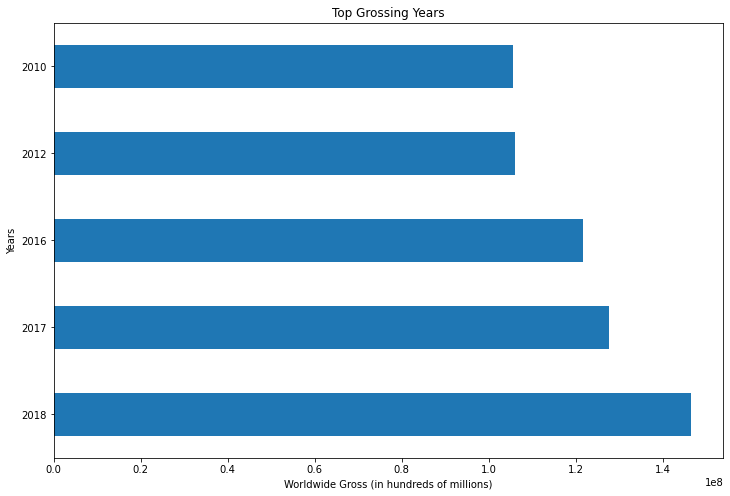

In [531]:
# Creates a new variable top_grossing_years_df to show the top five grossing years from 2010 - 2018
top_grossing_years_df = most_grossing_years_df.groupby(by='year').mean()['worldwide_gross'].sort_values(ascending=False).head(5).plot(kind='barh', figsize=(12,8))
plt.title('Top Grossing Years')
plt.xlabel('Worldwide Gross (in hundreds of millions)')
plt.ylabel('Years')
top_grossing_years_df

### Graphing The Top Grossing Studios

<AxesSubplot:title={'center':'Top Grossing Studios'}, xlabel='Worldwide Gross (in hundreds of millions)', ylabel='Studio'>

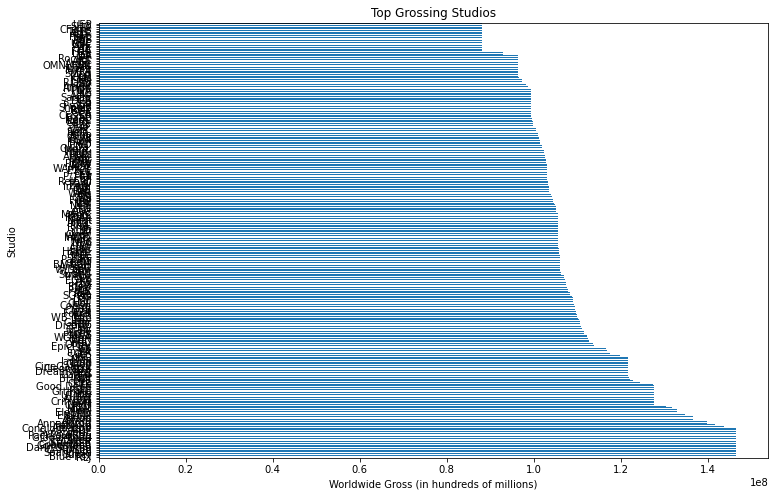

In [532]:
top_grossing_studios_df = most_grossing_studio_df.groupby(by='studio').mean()['worldwide_gross'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 8))
plt.title('Top Grossing Studios')
plt.xlabel('Worldwide Gross (in hundreds of millions)')
plt.ylabel('Studio')
top_grossing_studios_df

<AxesSubplot:title={'center':'Top Grossing Studios'}, xlabel='Worldwide Gross (in hundreds of millions)', ylabel='Studio'>

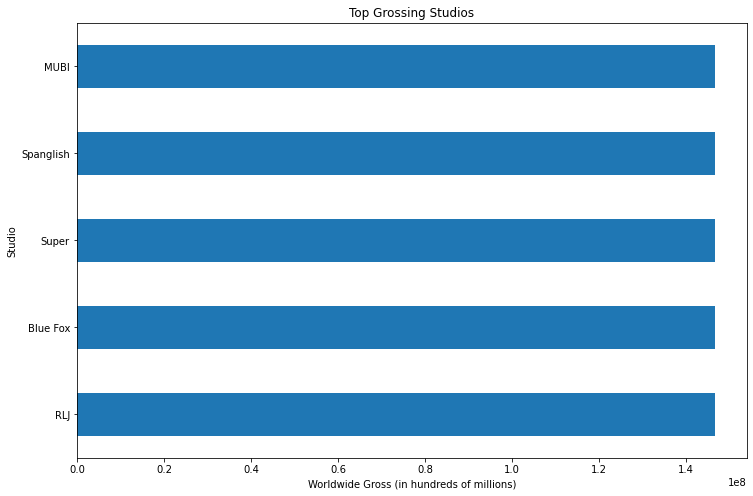

In [533]:
top_grossing_studios_df = most_grossing_studio_df.groupby(by='studio').mean()['worldwide_gross'].sort_values(ascending=False).head(5).plot(kind='barh', figsize=(12, 8))
plt.title('Top Grossing Studios')
plt.xlabel('Worldwide Gross (in hundreds of millions)')
plt.ylabel('Studio')
top_grossing_studios_df

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

My primary task with this project was to provide Microsoft's new movie studio with effective recommendations on how they can create successful films. In order to do that, I needed to discover which films were currently successful based off of their worldwide gross and explore variables related to the most grossing films. I chose to measure the most grossing genres, most grossing years, and most grossing studios.



## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***